## 딥러닝

### 심층신경망

In [6]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지 않음

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [7]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [9]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [11]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


##### 심층신경망 만들기1

In [22]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [23]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [24]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [30]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [32]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4709 - accuracy: 0.8354
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3585 - accuracy: 0.8723
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3229 - accuracy: 0.8849
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2982 - accuracy: 0.8929
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9009
Epoch 6/100
1500/1500 [==============================] - 1s 998us/step - loss: 0.2603 - accuracy: 0.9071
Epoch 7/100
1500/1500 [==============================] - 1s 999us/step - loss: 0.2462 - accuracy: 0.9124
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2317 - accuracy: 0.9174
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2190 - accuracy: 0.9229
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/st

In [33]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 825us/step - loss: 0.8479 - accuracy: 0.8779


[0.8479284048080444, 0.877916693687439]

In [35]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 755us/step


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [50]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [68]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

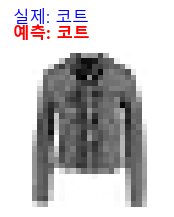

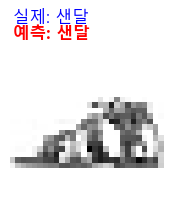

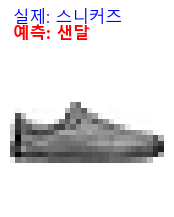

In [72]:
for i in range(10,13):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [73]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [74]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [79]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [80]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [83]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [84]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5215 - accuracy: 0.8173
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3862 - accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3520 - accuracy: 0.8732
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3293 - accuracy: 0.8806
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3170 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8942
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.8980
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2786 - accuracy: 0.9008
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.272

In [86]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 884us/step - loss: 0.4157 - accuracy: 0.8887


[0.4156677722930908, 0.8886666893959045]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [87]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [89]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [92]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1830 - accuracy: 0.9314
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1786 - accuracy: 0.9333
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1751 - accuracy: 0.9339
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1702 - accuracy: 0.9367
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1665 - accuracy: 0.9380
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1639 - accuracy: 0.9392
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1587 - accuracy: 0.9405
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1563 - accuracy: 0.9417
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1546 - accuracy: 0.9431
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.149

- optimizer 사용시 0.01정도 개선

In [91]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이

375/375 [==============================] - 0s 884us/step - loss: 0.3476 - accuracy: 0.8822


[0.34756651520729065, 0.8821666836738586]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림. 

In [93]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [94]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# 모델4 설정, 최적화는 adam클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [96]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5887 - accuracy: 0.7935
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4357 - accuracy: 0.8417
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3990 - accuracy: 0.8563
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8636
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3647 - accuracy: 0.8662
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8692
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.8746
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3315 - accuracy: 0.8790
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3267 - accuracy: 0.8793
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.318

In [99]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 851us/step - loss: 0.3268 - accuracy: 0.8844


[0.3268055021762848, 0.8844166398048401]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터 만 저장하는 두가지 방법이 존재

In [100]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [101]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야 


In [102]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'), 
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [103]:
model5.load_weights('./model4-weight.h5')

In [115]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 776us/step


- 모델까지 전부 생성해주는 방법

In [111]:
model6 = keras.models.load_model('./model4-whole.h5')

In [113]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 842us/step - loss: 0.3608 - accuracy: 0.8774


[0.3607817590236664, 0.8773999810218811]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용.

In [117]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [118]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [119]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [120]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6035 - accuracy: 0.7875 - val_loss: 0.4245 - val_accuracy: 0.8487
Epoch 2/20
 130/1500 [=>............................] - ETA: 1s - loss: 0.4492 - accuracy: 0.8397

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4431 - accuracy: 0.8393 - val_loss: 0.3933 - val_accuracy: 0.8570
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4078 - accuracy: 0.8505 - val_loss: 0.3743 - val_accuracy: 0.8616
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3881 - accuracy: 0.8589 - val_loss: 0.3677 - val_accuracy: 0.8639
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3695 - accuracy: 0.8657 - val_loss: 0.3482 - val_accuracy: 0.8725
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3586 - accuracy: 0.8682 - val_loss: 0.3378 - val_accuracy: 0.8734
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3482 - accuracy: 0.8716 - val_loss: 0.3371 - val_accuracy: 0.8746
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3387 - accuracy: 0.8743 - val_loss: 0.3329 - val_accuracy: 0.8763
Epo

In [121]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 926us/step - loss: 0.3238 - accuracy: 0.8816


[0.3238143026828766, 0.8815833330154419]

In [122]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 827us/step - loss: 0.3525 - accuracy: 0.8767


[0.35247543454170227, 0.8766999840736389]

In [123]:
early_stopp_cb.stopped_epoch

14

- 20번중 15번반복에서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서 
- `콜백` : 에포크마다 모델 저장 또는 조기종료 를 위해서 훈련 도중에 다른 기능을 수행하는 것